## Columbia University
### ECBM E4040 Neural Networks and Deep Learning. Fall 2021.

# Task 1: XNOR

In [55]:
# Import modules
from __future__ import print_function
import tensorflow as tf

physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

import numpy as np
from numpy.random import shuffle
import time
import matplotlib.pyplot as plt

# Plot configurations
%matplotlib inline

# Notebook auto reloads code. (Ref: http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython)
%load_ext autoreload
%autoreload 2
print(tf.__version__)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
2.7.0


In [71]:
plt.style.use("seaborn-bright")

##  Part 1: Backpropagation through time (BPTT)

**Question:** Consider a simple RNN network shown in the following figure, where _wx, wh, b1, w, b2_ are the scalar parameters of the network. The loss function is the **mean squared error (MSE)**. Given input _(x1, x2) = (-1, 2)_, ground truth _(g1, g2) = (0, 1), h0 = 0, and (wx, wh, b1, w, b2) = (3, 1, 2, -1, 1)_, **compute _(dwx, dwh, db1, dw, db2)_**, which are the gradients of loss with repect to 5 parameters _(wx, wh, b1, w, b2)_.

![bptt](./img/bptt2.jpg)

<span style="color:red">TODO:</span>

Answer the above question. 

* Show all of your derivations and the computational process.
* Use LATEX to edit the equations (Jupyter notebook can recognize the basic LATEX syntax). Alternatively, you can edit equations in some other environment and then paste the screenshot of the equations here.

<span style="color:red">Solution:</span>

$$\begin{aligned}
    h1 &= sigmoid(wx \times x1 + wh \times h0 + b1) \\
        &= sigmoid(3 \times -1 + 1 \times 0 + 2)\\
        &= sigmoid(-1) \\
        &= 0.26894 \\
    y1 &= sigmoid(w \times h1+b2) \\
        &= sigmoid(−1 \times 0.26894 + 1) \\
        &= sigmoid(0.7311) \\
        &= 0.67503 \\

    h2 &= sigmoid(wx \times x2 + wh \times h1 + b1) \\
        &= sigmoid(3 \times 2 + 1 \times 0.26894 + 2)\\
        &= sigmoid(8.2689) \\
        &= 0.99974 \\
    y2 &= sigmoid(w \times h2 + b2) \\
        &= sigmoid(−1 \times 0.99974 + 1) \\
        &= sigmoid(0.0003) \\
        &= 0.5 \\
\end{aligned}$$

### Loss function at time $t$

$$
    Lt = \frac{1}{2}(yt-gt)^2
$$

### dwx:
 
$$\begin{aligned}
  \dfrac{\delta L1}{\delta wx} &= \dfrac{\delta L1}{\delta y1}\dfrac{\delta y1}{\delta h1}\dfrac{\delta h1}{\delta wx} \\
  &= (y1-g1) \times y1(1-y1)w \times h1(1-h1)x1 \\
  &= 0.0291 
\end{aligned}$$

$$\begin{aligned}
  \dfrac{\delta L2}{\delta wx} &= \dfrac{\delta L2}{\delta y2}\dfrac{\delta y2}{\delta h2}\dfrac{\delta h2}{\delta wx} \\
  &= (y2-g2) \times y2(1-y2)w \times h2(1-h2)x2 \\
  &= 0.00007
\end{aligned}$$

$$\begin{aligned}
    dwx &= \dfrac{\delta L}{\delta wx} = \sum_{t=1}^n \dfrac{\delta Lt}{\delta wx} \\
    &= \dfrac{\delta L1}{\delta wx} + \dfrac{\delta L2}{\delta wx} \\
    &= 0.0292
\end{aligned}$$

### dwh:

$$\begin{aligned}
  \dfrac{\delta L1}{\delta wh} &= \dfrac{\delta L1}{\delta y1}\dfrac{\delta y1}{\delta h1}\dfrac{\delta h1}{\delta wh} \\
  &= (y1-g1) \times y1(1-y1)w \times h1(1-h1)h0 \\
  &= 0
\end{aligned}$$

$$\begin{aligned}
  \dfrac{\delta L2}{\delta wh} &= \dfrac{\delta L2}{\delta y2}\dfrac{\delta y2}{\delta h2}\dfrac{\delta h2}{\delta wh} \\
  &= (y2-g2) \times y2(1-y2)w \times h2(1-h2)h1 \\
  &= 0.00001
\end{aligned}$$

$$\begin{aligned}
    dwh &= \dfrac{\delta L}{\delta wh} = \sum_{t=1}^n \dfrac{\delta Lt}{\delta wh} \\
    &= \dfrac{\delta L1}{\delta wh} + \dfrac{\delta L2}{\delta wh} \\
    &= 0.0000
\end{aligned}$$

### db1:

$$\begin{aligned}
  \dfrac{\delta L1}{\delta b1} &= \dfrac{\delta L1}{\delta y1}\dfrac{\delta y1}{\delta h1}\dfrac{\delta h1}{\delta b1} \\
  &= (y1-g1) \times y1(1-y1)w \times h1(1-h1) \\
  &= -0.0291
\end{aligned}$$

$$\begin{aligned}
  \dfrac{\delta L2}{\delta b1} &= \dfrac{\delta L2}{\delta y2}\dfrac{\delta y2}{\delta h2}\dfrac{\delta h2}{\delta b1} \\
  &= (y2-g2) \times y2(1-y2)w \times h2(1-h2) \\
  &= 0.000037
\end{aligned}$$

$$\begin{aligned}
    db1 &= \dfrac{\delta L}{\delta b1} = \sum_{t=1}^n \dfrac{\delta Lt}{\delta b1} \\
    &= \dfrac{\delta L1}{\delta b1} + \dfrac{\delta L2}{\delta b1} \\
    &= -0.0291
\end{aligned}$$

### dw:

$$\begin{aligned}
  \dfrac{\delta L1}{\delta w} &= \dfrac{\delta L1}{\delta y1}\dfrac{\delta y1}{\delta w} \\
  &= (y1-g1) \times y1(1-y1)h1 \\
  &= 0.0398
\end{aligned}$$

$$\begin{aligned}
  \dfrac{\delta L2}{\delta w} &= \dfrac{\delta L2}{\delta y2}\dfrac{\delta y2}{\delta w} \\
  &= (y2-g2) \times y2(1-y2)h2 \\
  &= -0.1250
\end{aligned}$$

$$\begin{aligned}
    dw &= \dfrac{\delta L}{\delta w} = \sum_{t=1}^n \dfrac{\delta Lt}{\delta w} \\
    &= \dfrac{\delta L1}{\delta w} + \dfrac{\delta L2}{\delta w} \\
    &= -0.0851
\end{aligned}$$

### db2:

$$\begin{aligned}
  \dfrac{\delta L1}{\delta b2} &= \dfrac{\delta L1}{\delta y1}\dfrac{\delta y1}{\delta b2} \\
  &= (y1-g1) \times y1(1-y1) \\
  &= 0.1481
\end{aligned}$$

$$\begin{aligned}
  \dfrac{\delta L2}{\delta b2} &= \dfrac{\delta L2}{\delta y2}\dfrac{\delta y2}{\delta b2} \\
  &= (y2-g2) \times y2(1-y2) \\
  &= -0.125
\end{aligned}$$

$$\begin{aligned}
    db2 &= \dfrac{\delta L}{\delta b2} = \sum_{t=1}^n \dfrac{\delta Lt}{\delta b2} \\
    &= \dfrac{\delta L1}{\delta b2} + \dfrac{\delta L2}{\delta b2} \\
    &= 0.0231
\end{aligned}$$


In [80]:
# use tensorflow to verify the answer.
with tf.GradientTape() as G:
    w = tf.Variable(-1.0)
    b2 = tf.Variable(1.0)
    wx = tf.Variable(3.0)
    wh = tf.Variable(1.0)
    b1 = tf.Variable(2.0)

    h0 = tf.Variable(0.0)
    x = tf.Variable((-1.0,2.0))
    g = tf.Variable((0.0, 1.0))

    y = []
    h1 = tf.sigmoid(wx*x[0] + wh*h0 + b1)
    y.append(tf.sigmoid(w*h1 + b2))
    h2 = tf.sigmoid(wx*x[1] + wh*h1 + b1)
    y.append(tf.sigmoid(w*h2 + b2))

    loss = 0.5*(tf.square(g[0]-y[0]) + tf.square(g[1]-y[1]))

    dw_t, db2_t, dwx_t, dwh_t, db1_t = G.gradient(loss, [w, b2, wx, wh, b1])
    

print("Verified by tensorflow (TODO compare values with your hand-written calculations):")
print("dw = {:.4f}, db2 = {:.4f}, dwx = {:.4f}, dwh = {:.4f}, db1 = {:.4f}".format(dw_t, db2_t, dwx_t, dwh_t, db1_t))

Verified by tensorflow (TODO compare values with your hand-written calculations):
dw = -0.0851, db2 = 0.0231, dwx = 0.0292, dwh = 0.0000, db1 = -0.0291


## Part 2: Use TensorFlow modules to create XNOR network

In this part, you need to build and train an XNOR network that can learn the XNOR function. It is a very simple implementation of RNN and will give you an idea how RNN is built and how to train it.

### XNOR network

XNOR network can learn the XNOR ($\odot$) function

As shown in the figure below, and for instance, if input $(x_0, x_1, x_2, x_3, x_4, x_5, x_6, x_7)$=(0,0,1,1,1,1,1,0), then output $(y_1, y_2, y_3, y_4, y_5, y_6, y_7, y_8)$=(1,1,0,1,0,1,0,0). That is, $y_n = x_0\odot x_1 \odot ... \odot x_{n-1}\odot x_{n}$

![xnor_net](./img/xnor.png)

### Create a data set
This function provides a way to generate the data which is needed for the training process. You should utilize it when building your training function for the GRU. Read the source code for more information.

In [56]:
from utils.xnor.dataset import create_xnor_dataset

In [57]:
create_xnor_dataset(1)

(array([[[0],
         [0],
         [1],
         [1],
         [1],
         [0],
         [0],
         [0]]]),
 array([[0, 0, 1, 0, 1, 1, 1, 1]]))

### Build a network using a TensorFlow LSTMCell and GRUCell
In this section, you are asked to build a XNOR net using a TensorFlow LSTMCell and a GRUCell. In TensorFlow 2, these two cells are supported by Keras. Please check online documents below.

Reference: 
1. [TensorFlow(Keras): Working with RNNs](https://keras.io/guides/working_with_rnns/)
2. [TensorFlow: Recurrent Neural Networks (RNN) with Keras](https://www.tensorflow.org/guide/keras/rnn)
3. [TensorFlow LSTM cell](https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM)
4. [TensorFlow GRU cell](https://www.tensorflow.org/api_docs/python/tf/keras/layers/GRU)
5. [TensorFlow: Sequential Model](https://www.tensorflow.org/guide/keras/sequential_model)


<span style="color:red">TODO:</span>
Use TensorFlow to build and train your XNOR net. The dataset is already provided. You will do the following:
- Learn how to use **tf.keras.layers.LSTM** and **tf.keras.layers.GRU** in TensorFlow(Keras). 
- Choose appropriate parameters to build a model (Sequential Model in Keras is suggested). 
- Compile your model with appropriate loss function, optimizer, metrics, etc.
- Train your model and see the loss history.

Tips: 
1. Make sure that the shape of your data is corrrect after every step.
2. Choose your loss function according to your network design.
3. Choose 'accuracy' as your metrics when compiling your model.
4. Make sure that names of history for the network with LSTMCell and GRUCell (which you used while training) are the same as the ones in the plotting functions.
4. Feel free to ask TAs if you get stuck somewhere.

### Build a network with LSTM cell

In [58]:
in_data, out_data = create_xnor_dataset(1000) # create a dataset with a batch size of 1000

In [59]:
###################################################
# TODO: build a network with LSTM cell and train it.#
#                                                 #
###################################################

model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(128, input_shape=(8, 1), activation='relu', return_sequences=True, dropout=0.2, recurrent_dropout=0.2))
model.add(tf.keras.layers.Dense(64))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

model.summary()
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer='adam',
              metrics=['accuracy'])
history_LSTM = model.fit(in_data, out_data, batch_size=64, epochs=70)

###################################################
# END TODO                                        #
###################################################

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_22 (LSTM)              (None, 8, 128)            66560     
                                                                 
 dense_48 (Dense)            (None, 8, 64)             8256      
                                                                 
 dense_49 (Dense)            (None, 8, 1)              65        
                                                                 
Total params: 74,881
Trainable params: 74,881
Non-trainable params: 0
_________________________________________________________________
Epoch 1/70
16/16 [==============================] - 2s 10ms/step - loss: 0.6917 - accuracy: 0.5567
Epoch 2/70
16/16 [==============================] - 0s 10ms/step - loss: 0.6894 - accuracy: 0.5707
Epoch 3/70
16/16 [==============================] - 0s 10ms/step - loss: 0.6851 - accuracy: 0.5829
Epoch 4/70
16/16

#### Hint for creating a model with LSTM cells
```
model = tf.keras.Sequential() 
model.add(# insert layer 1)
model.add(# insert layer 2) 
model.add(# insert more layers) 
model.add(# insert output layer)

model.summary() 
model.compile(loss=#choose your loss function,
              optimizer=#choose your optimizer with learning rate,
              metrics=['accuracy']) 
history_LSTM = model.fit(in_data, out_data, batch_size=64, epochs=15) 
```

### Build a network with GRU cell

In [60]:
in_data, out_data = create_xnor_dataset(1000) # create a dataset with batch size of 1000

In [61]:
###################################################
# TODO: build a model with GRU cell and train it. #
#                                                 #
###################################################

model = tf.keras.Sequential()
model.add(tf.keras.layers.GRU(128, input_shape=(8, 1), activation='relu', return_sequences=True, dropout=0.2, recurrent_dropout=0.2))
model.add(tf.keras.layers.Dense(64))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

model.summary()
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer='adam',
              metrics=['accuracy'])
history_GRU = model.fit(in_data, out_data, batch_size=64, epochs=70)

###################################################
# END TODO                                        #
###################################################

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_6 (GRU)                 (None, 8, 128)            50304     
                                                                 
 dense_50 (Dense)            (None, 8, 64)             8256      
                                                                 
 dense_51 (Dense)            (None, 8, 1)              65        
                                                                 
Total params: 58,625
Trainable params: 58,625
Non-trainable params: 0
_________________________________________________________________
Epoch 1/70
16/16 [==============================] - 2s 9ms/step - loss: 0.6898 - accuracy: 0.5667
Epoch 2/70
16/16 [==============================] - 0s 9ms/step - loss: 0.6858 - accuracy: 0.5617
Epoch 3/70
16/16 [==============================] - 0s 8ms/step - loss: 0.6747 - accuracy: 0.5760
Epoch 4/70
16/16 [=

#### Hint for creating a model with GRU cell
```
model = tf.keras.Sequential()
model.add(# insert layer 1)
model.add(# insert layer 2)
model.add(# insert more layers)
model.add(# insert output layer)

model.summary()
model.compile(loss=#choose your loss function,
              optimizer=#choose your optimizer with learning rate,
              metrics=['accuracy'])
history_GRU = model.fit(in_data, out_data, batch_size=64, epochs=15)
```

### Visualize loss and accuracy

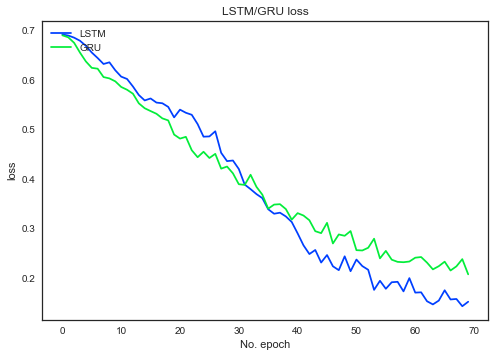

In [72]:
plt.plot(history_LSTM.history['loss'], label='LSTM')
plt.plot(history_GRU.history['loss'], label='GRU')
plt.title('LSTM/GRU loss')
plt.ylabel('loss')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

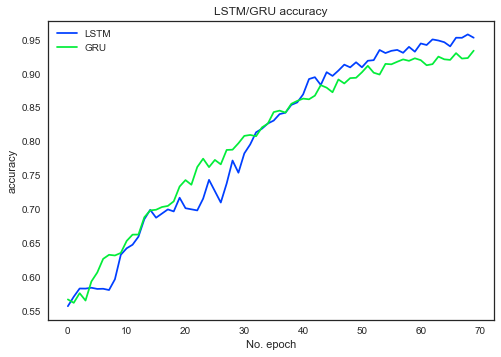

In [73]:
plt.plot(history_LSTM.history['accuracy'], label='LSTM')
plt.plot(history_GRU.history['accuracy'], label='GRU')
plt.title('LSTM/GRU accuracy')
plt.ylabel('accuracy')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

<span style="color:red">__TODO:__</span> Answer the question:

Which part of this task have you been struggling with most of the  time? Describe how you resolved it.

<span style="color:red">__SOLUTION:__</span>

I spent most of my time on understanding the input and output to LSTM cell of keras. I was very confused about the inputs and outputs of LSTM cell on paper and how it relates to keras implemetation. I reffered to many stack overflow posts to get it cleared. Learned about TimeDistributed layer in the process. Designing architecture was easy once understod input/outputs

References:

https://stackoverflow.com/questions/41863921/how-can-i-use-categorical-one-hot-labels-for-training-with-keras

https://stackoverflow.com/questions/47305618/what-is-the-role-of-timedistributed-layer-in-keras

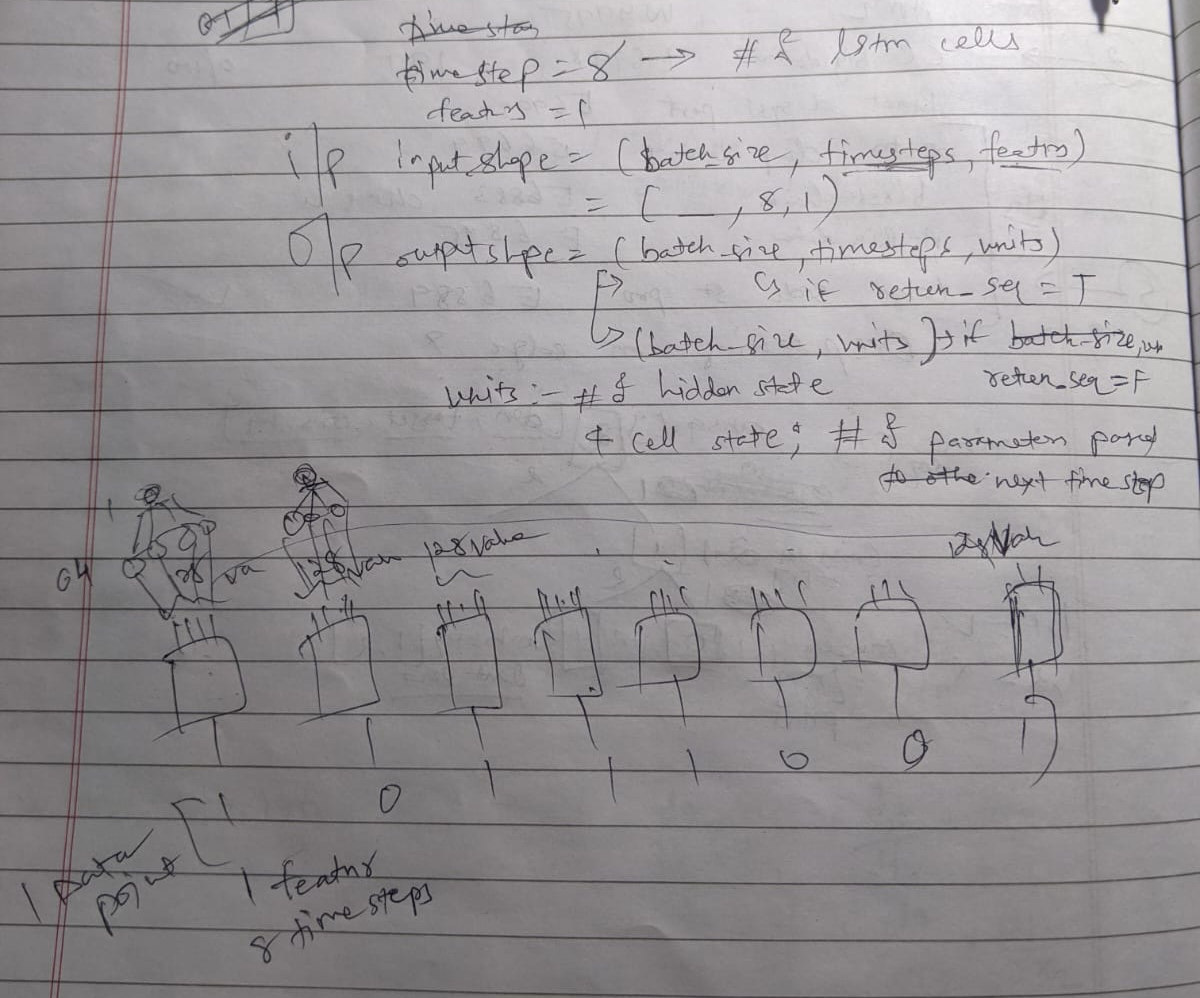

In [83]:
# Ignore this (for my future refenece)
from IPython.display import Image
Image(filename="./img/lstm_in_out.png")

<span style="color:red">__TODO:__</span> Answer the question:

Which loss function did you use? Why?

<span style="color:red">__SOLUTION:__</span>

I used `BinaryCrossentropy` becuase the output at each timestep is either 0 or 1 so, binary cross entropy loss makes the most sense to me.

## Part 3 :  Build your own LSTMCell
In this part, you need to build your own LSTM cell to achieve the LSTM functionality (including different types of gates that constitute the cell).

You should refer to the materials on how the LSTM cell works  - with its cell states, activation functions and kernels. 
<br>Please see the course slides or the website https://colah.github.io/posts/2015-08-Understanding-LSTMs/.

<span style="color:red">TODO:</span> 
1. Complete the function **LSTM_step** in utils/xnor/LSTM_step.py;
2. Verify the function by running the provided code.
3. Use the same way (as described above) to build the model and to train it.


In [79]:
from utils.xnor.LSTM_step import LSTM_step

cell_inputs = np.ones((1,1))
cell_states = [0.2*np.ones((1,64)), np.zeros((1,64))]
kernel = 0.1*np.ones((1,256))
recurrent_kernel = 0.1*np.ones((64,256))
bias = np.zeros(256)

h , [h,c] = LSTM_step(cell_inputs, cell_states, kernel, recurrent_kernel, bias)
print('Simple verification:')
print('Is h correct?', np.isclose(h.numpy()[0][0],0.48484358))
print('Is c correct?', np.isclose(c.numpy()[0][0],0.70387213))

Simple verification:
Is h correct? True
Is c correct? True


In [74]:
in_data, out_data = create_xnor_dataset(1000) # create a dataset with a batch size of 1000

In [75]:
###################################################
# TODO: build a network with LSTM cell and train it.#
#                                                 #
###################################################
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(128, input_shape=(8, 1), activation='relu', return_sequences=True, dropout=0.2, recurrent_dropout=0.2))
model.add(tf.keras.layers.Dense(64))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

model.summary()
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer='adam',
              metrics=['accuracy'])
history = model.fit(in_data, out_data, batch_size=64, epochs=70)

###################################################
# END TODO                                        #
###################################################

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_23 (LSTM)              (None, 8, 128)            66560     
                                                                 
 dense_52 (Dense)            (None, 8, 64)             8256      
                                                                 
 dense_53 (Dense)            (None, 8, 1)              65        
                                                                 
Total params: 74,881
Trainable params: 74,881
Non-trainable params: 0
_________________________________________________________________
Epoch 1/70
16/16 [==============================] - 2s 11ms/step - loss: 0.6925 - accuracy: 0.5341
Epoch 2/70
16/16 [==============================] - 0s 10ms/step - loss: 0.6897 - accuracy: 0.5701
Epoch 3/70
16/16 [==============================] - 0s 10ms/step - loss: 0.6868 - accuracy: 0.5501
Epoch 4/70
16/16

#### Hint for building a model with LSTM cell
```
model = tf.keras.Sequential()
model.add(# insert layer 1)
model.add(# insert layer 2)
model.add(# insert more layers)
model.add(# insert output layer)

model.summary()
model.compile(loss=#choose your loss function,
              optimizer=#choose your optimizer with learning rate,
              metrics=['accuracy'])
history = model.fit(in_data, out_data, batch_size=64, epochs=15)
```

### Visualize loss and accuracy

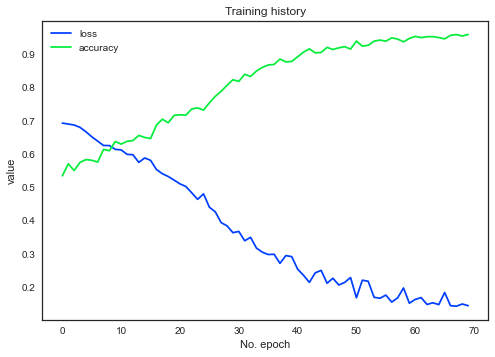

In [76]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['accuracy'], label='accuracy')
plt.title('Training history')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()